### SHOE CLASSIFICATION

In [11]:
from pathlib import Path
import pandas as pd
import os

# set the directory where the images are stored
direc = Path('C:/Users/chris/DSC680-T301/DSC680-T301/DSC680-T301/ut-zap50k-images')


# use glob to get all file paths with a .jpg extension
filepaths = list(direc.glob(r'**/**/**/*.jpg'))
img_df = pd.Series(filepaths, name='FilePaths').astype(str)
img_df = img_df.to_frame(name='FilePaths')


img_df['FileNames'] = img_df['FilePaths'].apply(lambda x: os.path.basename(x))
img_df['FolderName1'] = img_df['FilePaths'].apply(lambda x: os.path.dirname(x).split('\\')[-1])
img_df['FolderName2'] = img_df['FilePaths'].apply(lambda x: os.path.dirname(x).split('\\')[-2])
img_df['FolderName3'] = img_df['FilePaths'].apply(lambda x: os.path.dirname(x).split('\\')[-3])


In [12]:
img_df['Combined_Folder'] = img_df['FolderName2'] + '-' + img_df['FolderName3']
img_df.head()

,FilePaths,FileNames,FolderName1,FolderName2,FolderName3,Combined_Folder
0,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,7965307.5291.jpg,A. Testoni,Ankle,Boots,Ankle-Boots
1,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,7999255.363731.jpg,A. Testoni,Ankle,Boots,Ankle-Boots
2,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,8000978.364150.jpg,A. Testoni,Ankle,Boots,Ankle-Boots
3,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,8030969.3.jpg,adidas,Ankle,Boots,Ankle-Boots
4,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,8030970.107722.jpg,adidas,Ankle,Boots,Ankle-Boots


In [13]:
img_df.Combined_Folder.unique()

array(['Ankle-Boots', 'Knee High-Boots', 'Mid-Calf-Boots',
       'Over the Knee-Boots', 'Prewalker Boots-Boots', 'Athletic-Sandals',
       'Flat-Sandals', 'Heel-Sandals', 'Boat Shoes-Shoes',
       'Clogs and Mules-Shoes', 'Crib Shoes-Shoes', 'Firstwalker-Shoes',
       'Flats-Shoes', 'Heels-Shoes', 'Loafers-Shoes', 'Oxfords-Shoes',
       'Prewalker-Shoes', 'Sneakers and Athletic Shoes-Shoes',
       'Boot-Slippers', 'Slipper Flats-Slippers',
       'Slipper Heels-Slippers'], dtype=object)

### EXPLOTATORY DATA ANALYSIS

In [14]:
from tabulate import tabulate

# Get the value counts for each class label
value_counts = img_df['FolderName3'].value_counts()

# Calculate the percentages
percentages = value_counts / len(img_df) * 100

# Create a table with the results
table = []
for i, label in enumerate(img_df['FolderName3'].unique()):
    table.append([i+1, label, value_counts[label], f'{percentages[label]:.2f}%'])

# Print the table
print(tabulate(table, headers=['Rank', 'Class Label', 'Count', 'Percentage']))

  Rank  Class Label      Count  Percentage
------  -------------  -------  ------------
     1  Boots            12832  25.65%
     2  Sandals           5741  11.48%
     3  Shoes            30169  60.31%
     4  Slippers          1283  2.56%


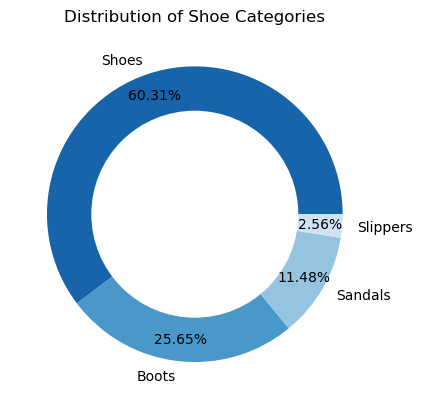

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors for the donut chart
colors = sns.color_palette('Blues_r', len(img_df['FolderName3'].unique()))

# Create a figure and axes
fig, ax = plt.subplots()

# Create the donut chart
ax.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%.2f%%', pctdistance=0.85, labeldistance=1.1)

# Add a circle at the center to create a donut chart
circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(circle)

# Set the title of the plot
plt.title('Distribution of Shoe Categories')

# Display the plot
plt.show()

In [16]:
from tabulate import tabulate

# Get the value counts for each class label
value_counts = img_df['Combined_Folder'].value_counts()

# Calculate the percentages
percentages = value_counts / len(img_df) * 100

# Create a table with the results
table = []
for i, label in enumerate(img_df['Combined_Folder'].unique()):
    table.append([i+1, label, value_counts[label], f'{percentages[label]:.2f}%'])

# Print the table
print(tabulate(table, headers=['Rank', 'Class Label', 'Count', 'Percentage']))


  Rank  Class Label                          Count  Percentage
------  ---------------------------------  -------  ------------
     1  Ankle-Boots                           5855  11.70%
     2  Knee High-Boots                       2202  4.40%
     3  Mid-Calf-Boots                        4724  9.44%
     4  Over the Knee-Boots                     49  0.10%
     5  Prewalker Boots-Boots                    2  0.00%
     6  Athletic-Sandals                        14  0.03%
     7  Flat-Sandals                          5601  11.20%
     8  Heel-Sandals                           126  0.25%
     9  Boat Shoes-Shoes                       629  1.26%
    10  Clogs and Mules-Shoes                 1427  2.85%
    11  Crib Shoes-Shoes                        23  0.05%
    12  Firstwalker-Shoes                      369  0.74%
    13  Flats-Shoes                           3994  7.98%
    14  Heels-Shoes                           5703  11.40%
    15  Loafers-Shoes                         2875  5.75%

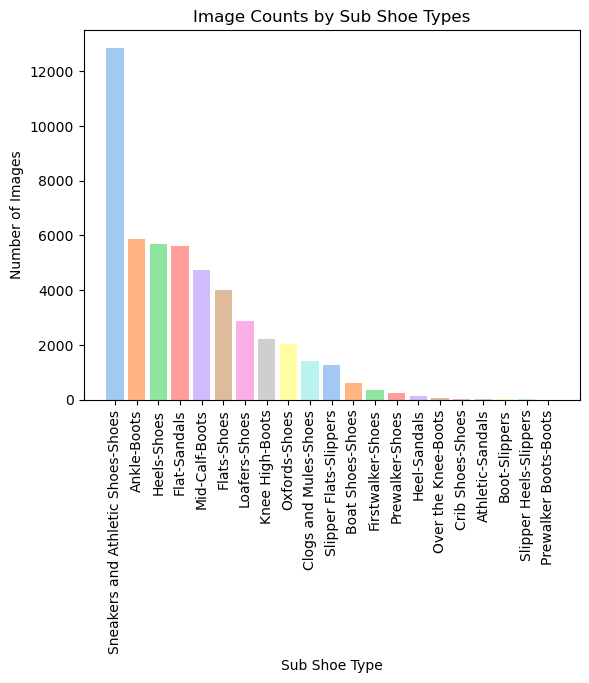

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of images in each sub shoe type category
counts = img_df['Combined_Folder'].value_counts()

# Define a color palette using muted colors from seaborn
colors = sns.color_palette('pastel', len(counts))

# Plot the results as a bar chart using the assigned colors
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values, color=colors)

# Add axis labels and a title
ax.set_xlabel('Sub Shoe Type')
ax.set_ylabel('Number of Images')
ax.set_title('Image Counts by Sub Shoe Types')

# Set the rotation of the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()




### DATA PREPARATION

There is not even data for few sub shoe types to include in model, eg. Over the Knee-Boots, Prewalker Boots- Boots etc. 

In [9]:
img_df = img_df.groupby('Combined_Folder').filter(lambda x : len(x)>=1000)
img_df_copy = img_df
img_df_copy.shape

(48540, 6)

In [10]:
img_df_copy

,FilePaths,FileNames,FolderName1,FolderName2,FolderName3,Combined_Folder
0,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,7965307.5291.jpg,A. Testoni,Ankle,Boots,Ankle-Boots
1,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,7999255.363731.jpg,A. Testoni,Ankle,Boots,Ankle-Boots
2,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,8000978.364150.jpg,A. Testoni,Ankle,Boots,Ankle-Boots
3,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,8030969.3.jpg,adidas,Ankle,Boots,Ankle-Boots
4,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,8030970.107722.jpg,adidas,Ankle,Boots,Ankle-Boots
...,...,...,...,...,...,...
50010,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,8052916.10230.jpg,Woolrich,Slipper Flats,Slippers,Slipper Flats-Slippers
50011,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,8038846.3.jpg,Yellow Box,Slipper Flats,Slippers,Slipper Flats-Slippers
50012,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,8038846.401.jpg,Yellow Box,Slipper Flats,Slippers,Slipper Flats-Slippers
50013,C:\Users\chris\DSC680-T301\DSC680-T301\DSC680-...,8038854.11.jpg,Yellow Box,Slipper Flats,Slippers,Slipper Flats-Slippers


### TRAIN AND VALIDATE THE IMAGES

In [12]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

# Define the data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Split the data into training, validation, and testing sets
train_df = img_df_copy.sample(frac=0.7, random_state=42)
val_df = img_df_copy.loc[~img_df.index.isin(train_df.index)].sample(frac=0.5, random_state=42)
test_df = img_df_copy.loc[~img_df.index.isin(train_df.index) & ~img_df.index.isin(val_df.index)]

# Create the data generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col='FilePaths',
    y_col='Combined_Folder',
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=32)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=None,
    x_col='FilePaths',
    y_col='Combined_Folder',
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=32)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=None,
    x_col='FilePaths',
    y_col='Combined_Folder',
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=32)


Found 33978 validated image filenames belonging to 11 classes.
Found 7281 validated image filenames belonging to 11 classes.
Found 7281 validated image filenames belonging to 11 classes.


The ImageDataGenerator class from the Keras API creates image data generators for the training and validation subsets of the image dataset. The ImageDataGenerator class is used to preprocess the images, rescale the pixel values to be between 0 and 1, and split the data into the specified subsets. The flow_from_dataframe() method is used to load the image data from the dataframe and directory provided and yield batches of augmented data for training or validation. The images are resized to 128 x 128 pixels and loaded in batches of 32 images at a time.

### Convolutional Neural Network (CNN) model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define constants
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
BATCH_SIZE = 32
NUM_CLASSES = 11
NUM_CHANNELS = 3 # assuming RGB color space

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANNELS)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [15]:
# Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=1
)


Epoch 1/10
1062/1062 [==============================] - 637s 599ms/step - loss: 1.0894 - accuracy: 0.6334 - val_loss: 0.7261 - val_accuracy: 0.7524
Epoch 2/10
1062/1062 [==============================] - 587s 552ms/step - loss: 0.7301 - accuracy: 0.7527 - val_loss: 0.5446 - val_accuracy: 0.8085
Epoch 3/10
1062/1062 [==============================] - 584s 549ms/step - loss: 0.6444 - accuracy: 0.7804 - val_loss: 0.5015 - val_accuracy: 0.8237
Epoch 4/10
1062/1062 [==============================] - 624s 588ms/step - loss: 0.5908 - accuracy: 0.7977 - val_loss: 0.4988 - val_accuracy: 0.8247
Epoch 5/10
1062/1062 [==============================] - 689s 648ms/step - loss: 0.5537 - accuracy: 0.8080 - val_loss: 0.4670 - val_accuracy: 0.8320
Epoch 6/10
1062/1062 [==============================] - 656s 617ms/step - loss: 0.5269 - accuracy: 0.8154 - val_loss: 0.4514 - val_accuracy: 0.8416
Epoch 7/10
1062/1062 [==============================] - 605s 569ms/step - loss: 0.5048 - accuracy: 0.8234 - val_

### TESTING MODEL

In [16]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


228/228 [==============================] - 48s 211ms/step - loss: 0.4264 - accuracy: 0.8540
Test loss: 0.4263526201248169
Test accuracy: 0.8540035486221313


In [17]:
from tensorflow.keras.models import load_model
model.save("C:/Users/chris/DSC680-T301/DSC680-T301/DSC680-T301/model_Class.h5")
model = load_model("C:/Users/chris/DSC680-T301/DSC680-T301/DSC680-T301/model_Class.h5")

### VALIDATION WITH IMAGES

1/1 [==============================] - 0s 129ms/step
Top 5 predicted classes:
1. Slipper Flats-Slippers: 1.0
2. Clogs and Mules-Shoes: 0.0
3. Ankle-Boots: 0.0
4. Heels-Shoes: 0.0
5. Flat-Sandals: 0.0


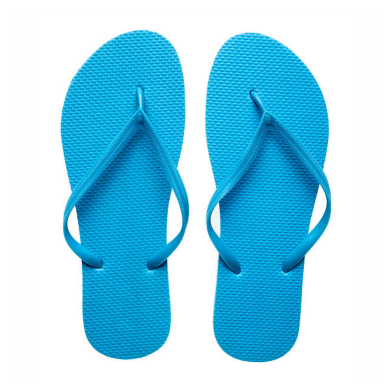

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('C:/Users/chris/DSC680-T301/DSC680-T301/DSC680-T301/model_Class.h5')

# Load the image to be classified
img_path = 'C:/Users/chris/OneDrive/Desktop/Slipper.jpg'
img = load_img(img_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Define the class labels
class_labels = pd.unique(img_df_copy['Combined_Folder'])

# Make the prediction
probas = model.predict(img_array).flatten()

# Sort the probabilities in descending order
idx = np.argsort(probas)[::-1]

# Print the top 5 class labels with their probabilities
print('Top 5 predicted classes:')
for i in range(5):
    label = class_labels[idx[i]]
    prob = round(probas[idx[i]], 3)
    print(f'{i+1}. {label}: {prob}')

predicted_class_index = np.argmax(probas)
predicted_class = class_labels[predicted_class_index]


# Load the image using matplotlib
img = plt.imread(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 128ms/step
Top 5 predicted classes:
1. Ankle-Boots: 1.0
2. Slipper Flats-Slippers: 0.0
3. Sneakers and Athletic Shoes-Shoes: 0.0
4. Oxfords-Shoes: 0.0
5. Loafers-Shoes: 0.0


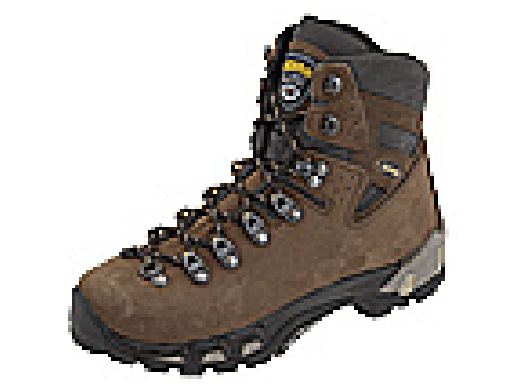

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('C:/Users/chris/DSC680-T301/DSC680-T301/DSC680-T301/model_Class.h5')

# Load the image to be classified
img_path = 'C:/Users/chris/OneDrive/Desktop/Boots.jpg'
img = load_img(img_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Define the class labels
class_labels = pd.unique(img_df_copy['Combined_Folder'])

# Make the prediction
probas = model.predict(img_array).flatten()

# Sort the probabilities in descending order
idx = np.argsort(probas)[::-1]

# Print the top 5 class labels with their probabilities
print('Top 5 predicted classes:')
for i in range(5):
    label = class_labels[idx[i]]
    prob = round(probas[idx[i]], 3)
    print(f'{i+1}. {label}: {prob}')

predicted_class_index = np.argmax(probas)
predicted_class = class_labels[predicted_class_index]


# Load the image using matplotlib
img = plt.imread(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
